# Analyzing Employee Exit Surveys
The aim of this project is to determine is the high rates of turnover for the Department of Education, Training and Employment (DETE) and Technical and Further Education (TAFE) institutes are related to some kind of dissatisfaction; while also taking into account different random effects like age or time employed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 150 # Avoid truncated output

In [2]:
# DETE
dete_survey = pd.read_csv("dete_survey.csv")
print(dete_survey.info())
print("\n")
print(dete_survey.head())
print("\n")
print(dete_survey.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [3]:
# TAFE
tafe_survey = pd.read_csv("tafe_survey.csv")
print(tafe_survey.info())
print("\n")
print(tafe_survey.head())
print("\n")
print(tafe_survey.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

* DETE contains some "Not Stated" statements but they are not represented as NaNs.
* Both have many columns with many NaNs that don't contribute to our analysis - they will be dropped.
* They have the same columns, although with different names - they will be standarized
* As a quick approach to the general questions, there are many answers that point out to dissatisfaction as a reason to leave the job.

## Data Cleaning

In [4]:
# Dropping irrelevant columns
dete_survey = pd.read_csv("dete_survey.csv", na_values="Not Stated")
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [5]:
# Standarizing column names
# Lower case and snakecase for dete
dete_survey_updated.columns = (dete_survey_updated.columns
                               .str.replace(" ", "_").str.strip().str.lower())

# Copying DETE names on TAFE
mapping = {"Record ID": "id", "CESSATION YEAR": "cease_date", 
          "Reason for ceasing employment": "separationtype", 
          "Gender. What is your Gender?": "gender", "CurrentAge. Current Age": 
          "age", "Employment Type. Employment Type": "employment_status", 
          "Classification. Classification": "position", 
          "LengthofServiceOverall. Overall Length of Service at Institute (in years)":
          "institute_service", "LengthofServiceCurrent. Length of Service at current workplace (in years)": 
          "role_service"}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis=1)

dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [6]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [7]:
# Only Resignations for the analysis
print(dete_survey_updated["separationtype"].value_counts())
print(tafe_survey_updated["separationtype"].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [8]:
# 3 types of resignation for DETE, 1 for TAFE
# They are separated by "-"; we'll split it and select the first element
# Copy function to avoid SettingWithCopy Warning
dete_survey_updated["separationtype"] = (dete_survey_updated["separationtype"]
                                         .str.split("-").str[0])
dete_resignations = (dete_survey_updated[dete_survey_updated["separationtype"]
                                         == "Resignation"].copy())
tafe_resignations = (tafe_survey_updated[tafe_survey_updated["separationtype"]
                                         == "Resignation"]. copy())

We dropped the irrelevant columns, standarized their names and filtered our dataset by only keeping those people who resigned.

In [9]:
# Verifying data quality - cease_date column
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
09/2010      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

In [10]:
# Extracting Year
dete_resignations["cease_date"] = (dete_resignations["cease_date"]
                                   .str.split("/").str[-1].astype(float))

In [11]:
# Checking for outliers
dete_resignations["cease_date"].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [12]:
# Checking for outliers
dete_resignations["dete_start_date"].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [13]:
# Checking outliers
tafe_resignations["cease_date"].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

The years in both dataframes don't completely align. The tafe_survey_updated dataframe contains some cease dates in 2009, but the dete_survey_updated dataframe does not. The tafe_survey_updated dataframe also contains many more cease dates in 2010 than the dete_survey_updaed dataframe. Since we aren't concerned with analyzing the results by year, we'll leave them as is

## Data Analysis

In [14]:
dete_resignations["institute_service"] = (dete_resignations["cease_date"] - 
                                          dete_resignations["dete_start_date"])
dete_resignations["institute_service"].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

Resignations are obviously skewed towards the first years, which could explain a trend of employeess not staying nearly as much on a company as in the past.

### Identifying Dissatisfied Employees

In [15]:
print(tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts())
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [16]:
def updated_vals(x):
    if pd.isnull(x):
        return np.nan
    elif x == "-":
        return False
    else:
        return True

# TAFE Dissatisfaction
tafe_resignations["dissatisfied"] = (tafe_resignations[
    ["Contributing Factors. Dissatisfaction", 
    "Contributing Factors. Job Dissatisfaction"]]
    .applymap(updated_vals).any(1, skipna=False))
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up["dissatisfied"].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

In [17]:
# DETE Dissatisfaction
dete_resignations["dissatisfied"] = (dete_resignations[
    ["job_dissatisfaction", "dissatisfaction_with_the_department", 
    "physical_work_environment", "lack_of_recognition", 
    "lack_of_job_security", "work_location", "employment_conditions", 
    "work_life_balance", "workload"]].any(1,skipna=False))
dete_resignations_up = dete_resignations.copy()
dete_resignations_up["dissatisfied"].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

We see  91 dissatisfied employees on TAFE and 149 on DETE that ended up resigning.

In [18]:
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

# Combining dataframes

combined = pd.concat([dete_resignations_up, tafe_resignations_up], 
                     ignore_index=True)
#Dropping columns with less than 500 NaNs
combined_updated = combined.dropna(thresh=500, axis=1).copy()

In [19]:
combined_updated["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


In [20]:
# Cleaning institute_service column
# Sorting number of employees by time on the company
combined_updated["institute_service_up"] = (combined_updated
                                            ["institute_service"]
                                            .astype(str).str.extract(r"(\d+)"))
# print(combined_updated["institute_service_up"])
combined_updated["institute_service_up"] = (combined_updated
                                            ["institute_service_up"]
                                            .astype(float))
combined_updated["institute_service_up"].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [21]:
def transform_service(val):
    if pd.isnull(val):
        return np.nan
    elif 0 <= val < 3:
        return "New"
    elif 3 <= val < 7:
        return "Experienced"
    elif 7 <= val < 11:
        return "Established"
    elif val >= 11:
        return "Veteran"
combined_updated["service_cat"] = (combined_updated["institute_service_up"]
                                   .apply(transform_service))
combined_updated["service_cat"].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

Out of the dissatisfied employees who resigned, 193 were new (0-2 years), were experienced(3-6), 62 were established (7-10) and 136 were veterans (more than 11 years)

In [22]:
combined_updated["dissatisfied"].value_counts(dropna=False)
# They are True or False values, transformed to 1 and 0 in Pivot Tables

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [23]:
# Replacing NaNs with True or False, depeding on which occurs more
# frequently on the dissatisfied columns (False=402 > True=241)
combined_updated["dissatisfied"] = (combined_updated["dissatisfied"]
                                    .fillna(False))

In [24]:
# Since True = 1, calculating mean will calculate percentage of 
# dissatisfied employees - mean is default aggfunc argument
pv = combined_updated.pivot_table(index='service_cat',
                                       values='dissatisfied')
pv

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


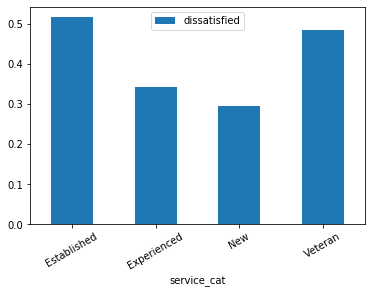

In [25]:
pv.plot(kind="bar", rot=30)
plt.show()

We can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to handle the rest of the missing data to finalize our analysis.

### Age Analysis

In [26]:
combined_updated["age"].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
31  35           32
36  40           32
31-35            29
21-25            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [27]:
# Cleaning
combined_updated["age"] = (combined_updated["age"].astype(str)
                           .str.extract(r"(\d+)"))
print(combined_updated["age"])
combined_updated["age"].isnull().sum()

0       36
1       41
2       31
3       46
4       31
      ... 
646     21
647     51
648    NaN
649     51
650     26
Name: age, Length: 651, dtype: object


55

In [28]:
# 55 NaNs - We fill them with truncated mean
print(combined_updated["age"].astype(float).mean())
# 39.27 - We convert to 39
combined_updated["age"] = combined_updated["age"].fillna(int(39))
combined_updated["age"] = combined_updated["age"].astype(int)
combined_updated["age"].isnull().sum()

39.27181208053691


0

In [29]:
# Setting age groups
print(min(combined_updated["age"]))
print(max(combined_updated["age"]))
combined_updated["age"].value_counts()

20
61


41    93
46    81
36    73
51    71
26    67
21    62
31    61
56    55
39    55
61    23
20    10
Name: age, dtype: int64

We decide to set 4 age groups:
* 20 - 29
* 30 - 39
* 40 - 49
* 50+

In [30]:
def set_age_group(age):
    if 20 <= age < 30:
        return "Young"
    elif 30 <= age < 40:
        return "Middle Aged"
    elif 40 <= age < 50:
        return "Older"
    elif age > 50:
        return "Oldest"

combined_updated["age"] = combined_updated["age"].apply(set_age_group)
combined_updated["age"].value_counts()

Middle Aged    189
Older          174
Oldest         149
Young          139
Name: age, dtype: int64

In [31]:
age_pv = combined_updated.pivot_table(index="age", values="dissatisfied")
age_pv

,dissatisfied
age,
Middle Aged,0.328042
Older,0.379310
Oldest,0.422819
Young,0.352518


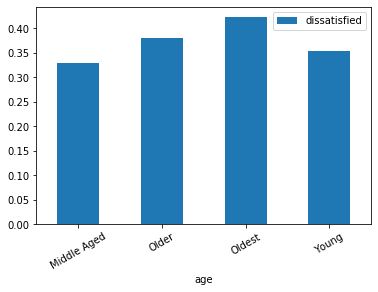

In [32]:
age_pv.plot(kind="bar", rot=30)
plt.show()

We see the oldest people (50+) as the group with the most resignations due to dissatisfaction; followed by those in the "Older" category (40-49). Previously we saw that veterans and established workers were the ones leaving. Together, this might mean there's been a change in the workplace that is making people with many years in the institutes resign.